In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement 7

Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset. Compute Confusion matrix to find TP, FP, TN, FN,  Accuracy, Error rate, Precision, Recall on the given dataset.

In [ ]:
import pandas as pd

In [142]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exam_datasets/7.social_network_ads.csv')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [151]:
data = data.replace('Female', 1)
data = data.replace('Male', 0)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [154]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f'Predicted class labels: {y_pred}')

Predicted class labels: [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0]


In [153]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Compute the accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f'Confusion Matrix: {cm}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Error Rate: {error_rate:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Confusion Matrix: [[64  1]
 [18 17]]
TP: 17, FP: 1, TN: 64, FN: 18
Accuracy: 0.81
Error Rate: 0.19
Precision: 0.94
Recall: 0.49


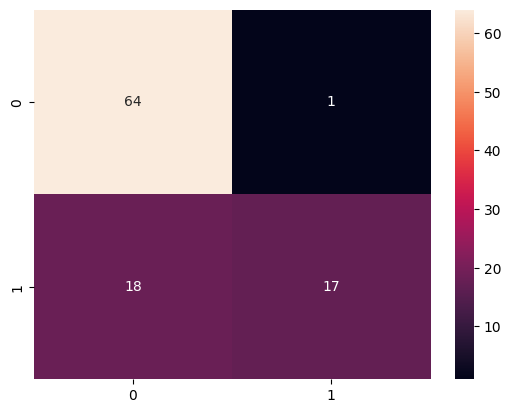

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True)
plt.show()